In [2]:
import sys
sys.path.append('/kaggle/input/data-loader/')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_kaggle_data_all_months

In [5]:
df = load_kaggle_data_all_months()

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print(df.head())
print("\nDataset Info:")
df.info()

                event_time        event_type  product_id          category_id  \
0  2019-11-01 00:00:02 UTC              view     5802432  1487580009286598681   
1  2019-11-01 00:00:09 UTC              cart     5844397  1487580006317032337   
2  2019-11-01 00:00:10 UTC              view     5837166  1783999064103190764   
3  2019-11-01 00:00:11 UTC              cart     5876812  1487580010100293687   
4  2019-11-01 00:00:24 UTC  remove_from_cart     5826182  1487580007483048900   

  category_code     brand  price    user_id  \
0           NaN       NaN   0.32  562076640   
1           NaN       NaN   2.38  553329724   
2           NaN       pnb  22.22  556138645   
3           NaN  jessnail   3.16  564506666   
4           NaN       NaN   3.33  553329724   

                           user_session  
0  09fafd6c-6c99-46b1-834f-33527f4de241  
1  2067216c-31b5-455d-a1cc-af0575a34ffb  
2  57ed222e-a54a-4907-9944-5a875c2d7f4f  
3  186c1951-8052-4b37-adce-dd9644b1d5f7  
4  2067216c-31b5-455

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

Missing values per column:
event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

Number of duplicate rows: 1109098
Number of rows after dropping duplicates: 19583742


In [7]:
df['event_time'] = pd.to_datetime(df['event_time'])
    
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object


Plotting distributions for numerical columns: ['price']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


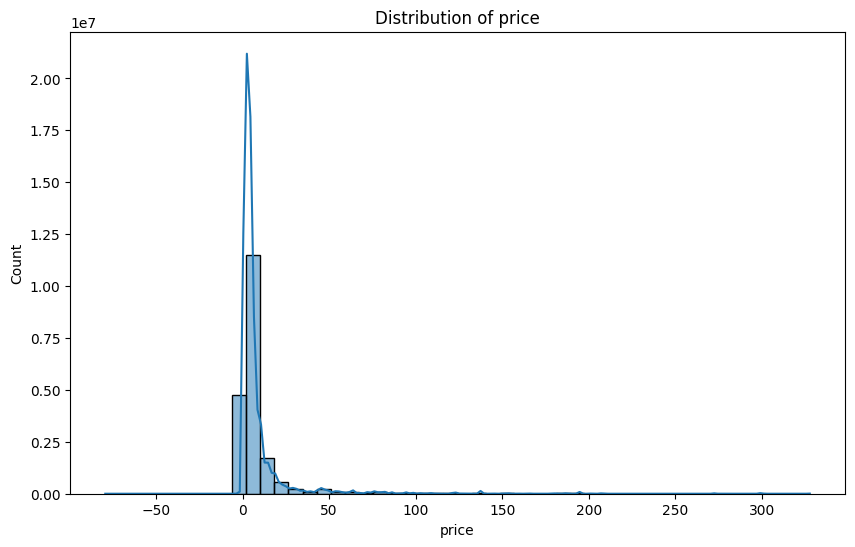

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
ids_to_exclude = ['product_id', 'category_id', 'user_id']
numerical_cols_to_plot = [col for col in numerical_cols if col not in ids_to_exclude]

print(f"Plotting distributions for numerical columns: {numerical_cols_to_plot}")

for col in numerical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

Plotting distributions for categorical columns: ['event_type', 'category_code', 'brand', 'user_session']


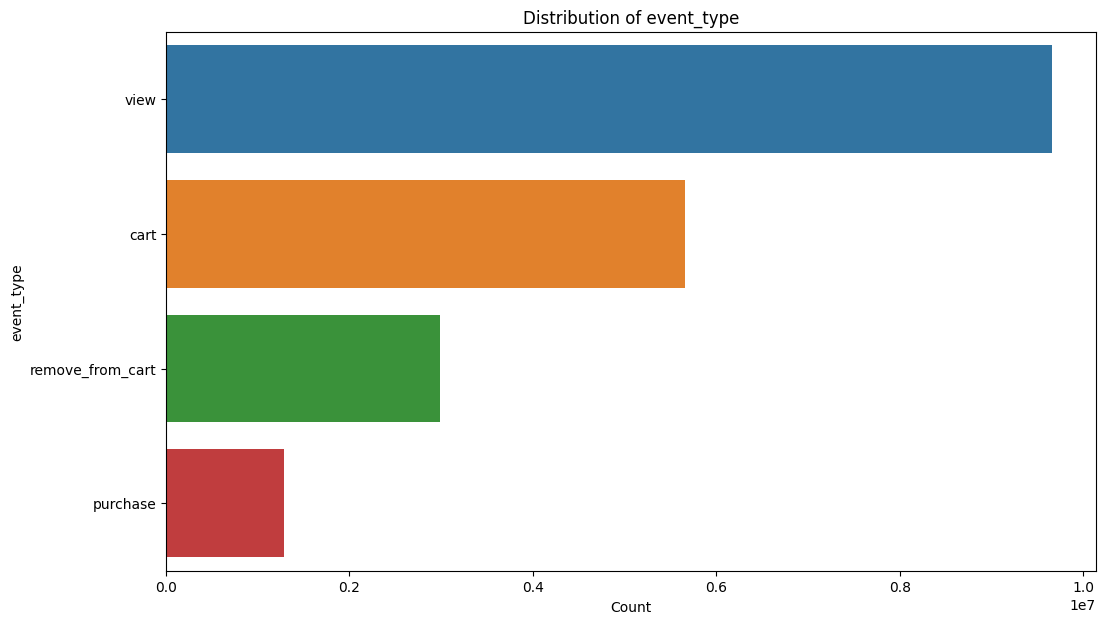

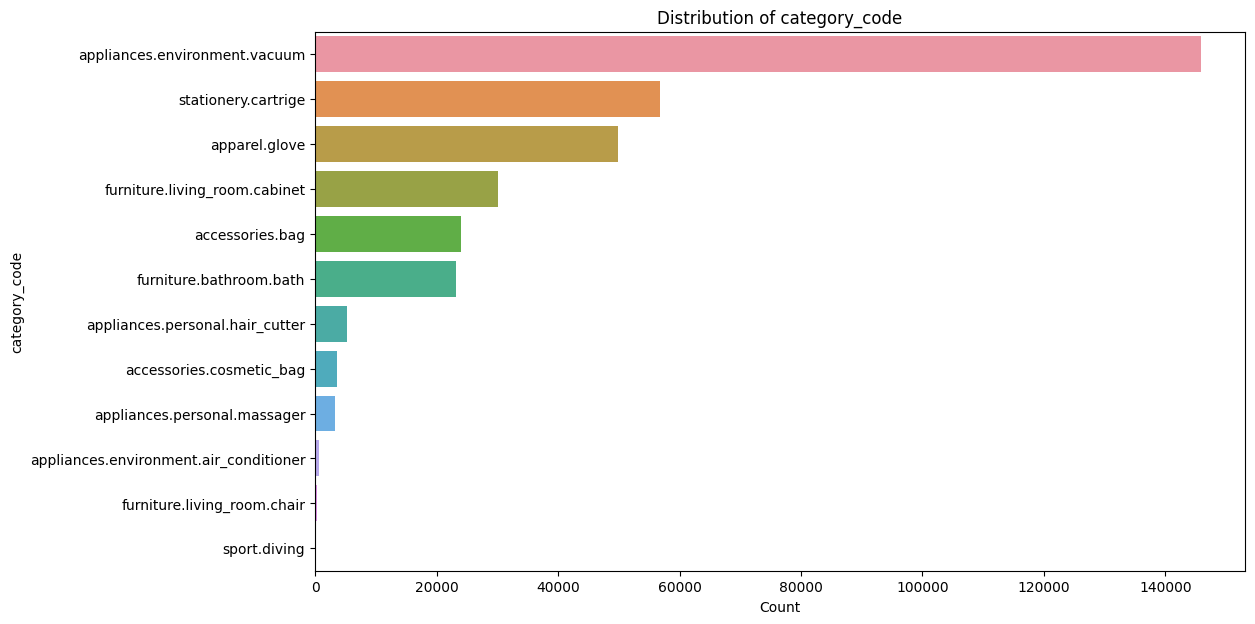

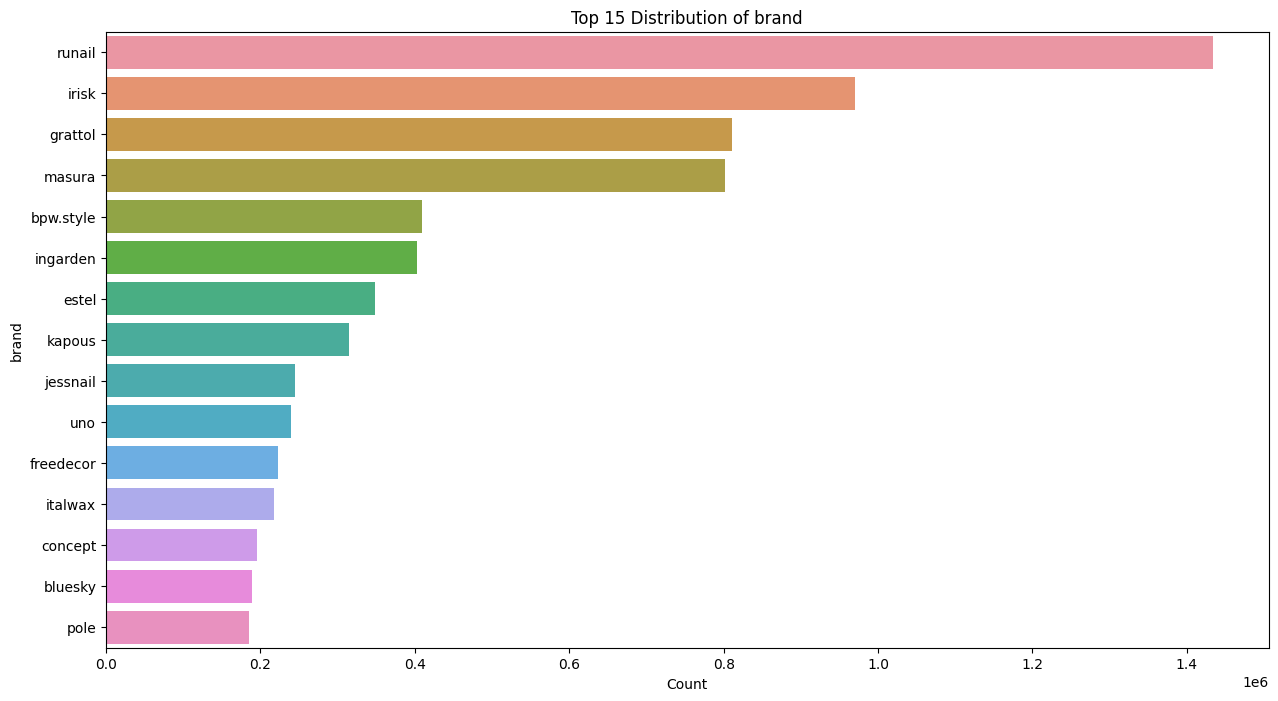

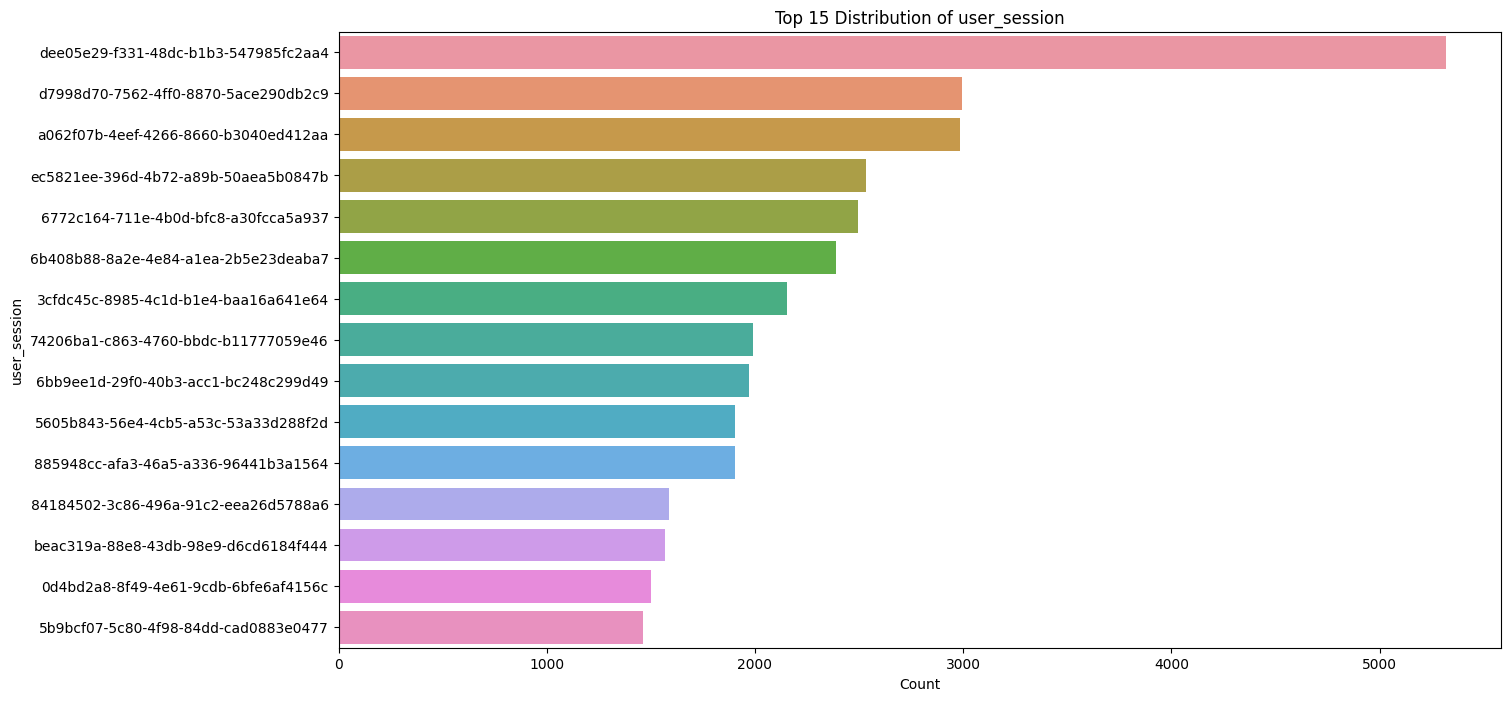

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Plotting distributions for categorical columns: {categorical_cols}")

for col in categorical_cols:
    top_n = 15
    if df[col].nunique() > top_n:
        top_categories = df[col].value_counts().nlargest(top_n).index
        df_top = df[df[col].isin(top_categories)]
        
        plt.figure(figsize=(15, 8))
        sns.countplot(y=col, data=df_top, order=top_categories)
        plt.title(f'Top {top_n} Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
    else:
        plt.figure(figsize=(12, 7))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

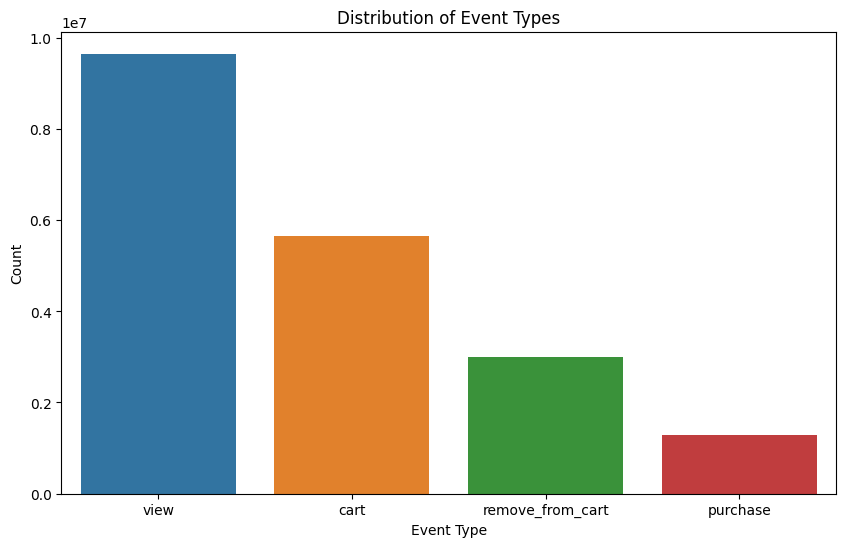

event_type
view                9656790
cart                5652991
remove_from_cart    2987859
purchase            1286102
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='event_type', data=df, order=df['event_type'].value_counts().index)
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

print(df['event_type'].value_counts())

Top 10 Most Purchased Products:
product_id
5809910    7549
5854897    4630
5700037    3682
5802432    3533
5751422    3521
5809912    3307
5815662    3246
5304       3133
5751383    2948
5849033    2782
Name: count, dtype: int64


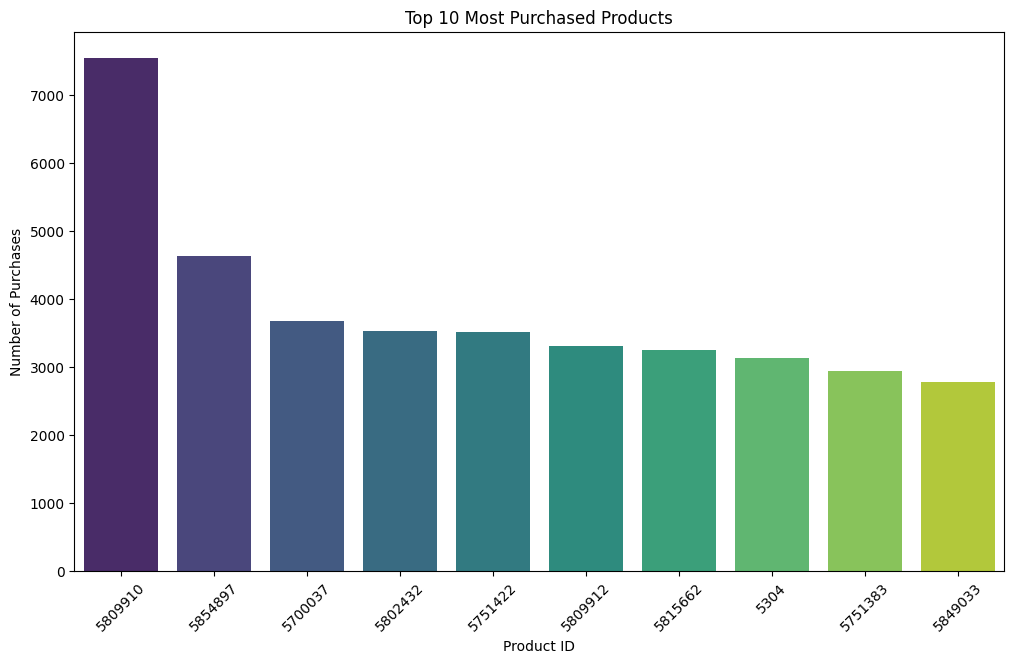

In [12]:
purchases_df = df[df['event_type'] == 'purchase']
    
top_10_products = purchases_df['product_id'].value_counts().head(10)

print("Top 10 Most Purchased Products:")
print(top_10_products)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_products.index.astype(str), y=top_10_products.values, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

User Funnel:
event_type
view        1597754
cart         398308
purchase     110518
Name: user_id, dtype: int64

Conversion Rate (View to Cart): 24.93%
Conversion Rate (Cart to Purchase): 27.75%


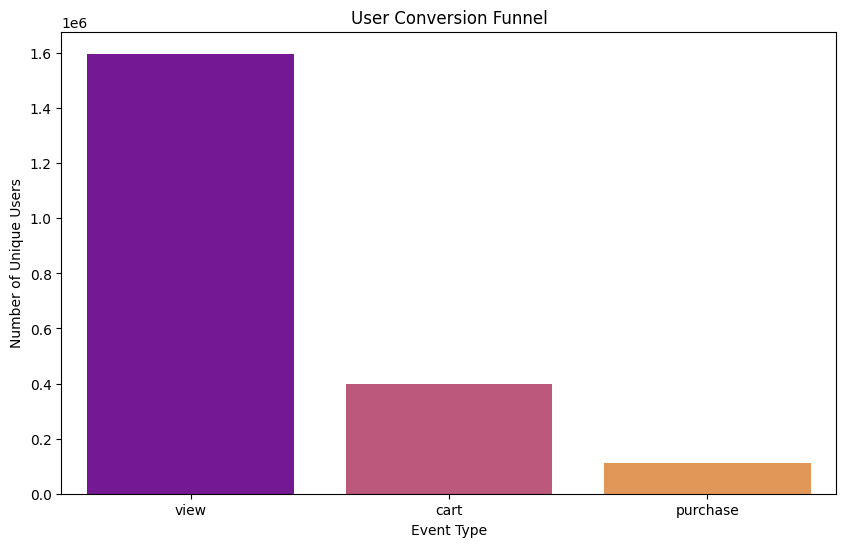

In [14]:
funnel_data = df.groupby('event_type')['user_id'].nunique().sort_values(ascending=False)
    
funnel_data = funnel_data.reindex(['view', 'cart', 'purchase'])

print("User Funnel:")
print(funnel_data)

view_to_cart_rate = funnel_data['cart'] / funnel_data['view'] * 100
cart_to_purchase_rate = funnel_data['purchase'] / funnel_data['cart'] * 100

print(f"\nConversion Rate (View to Cart): {view_to_cart_rate:.2f}%")
print(f"Conversion Rate (Cart to Purchase): {cart_to_purchase_rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.barplot(x=funnel_data.index, y=funnel_data.values, palette='plasma')
plt.title('User Conversion Funnel')
plt.xlabel('Event Type')
plt.ylabel('Number of Unique Users')
plt.show()

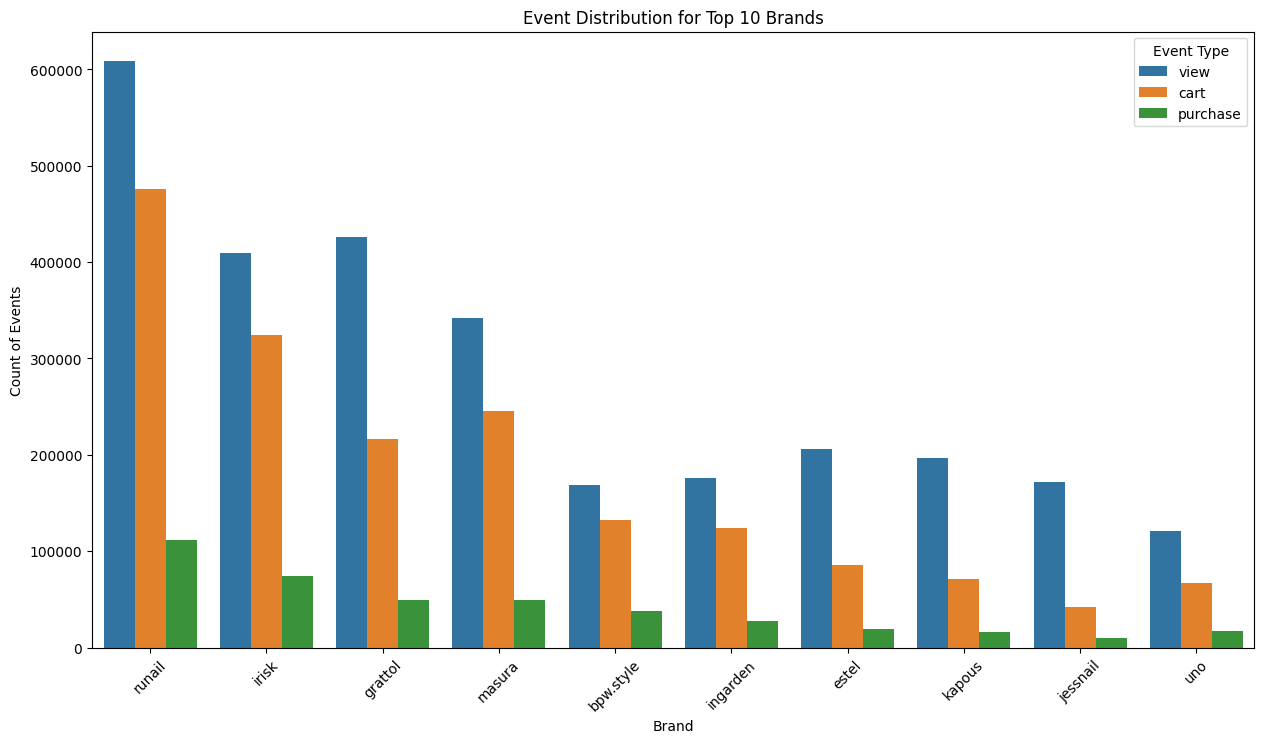

In [15]:
top_10_brands = df['brand'].dropna().value_counts().head(10).index.tolist()
    
df_top_brands = df[df['brand'].isin(top_10_brands)]

plt.figure(figsize=(15, 8))
sns.countplot(x='brand', hue='event_type', data=df_top_brands, 
              order=top_10_brands, hue_order=['view', 'cart', 'purchase'])
plt.title('Event Distribution for Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count of Events')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

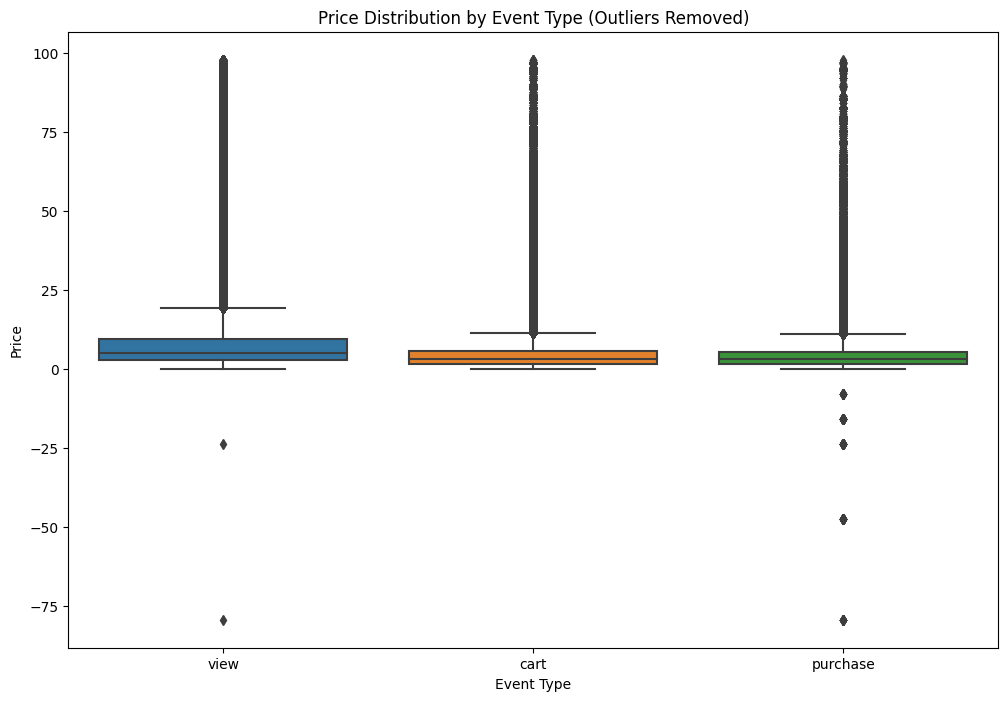

In [16]:
price_cap = df['price'].quantile(0.99)
df_filtered_price = df[df['price'] < price_cap]

plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='price', data=df_filtered_price, 
            order=['view', 'cart', 'purchase'])
plt.title('Price Distribution by Event Type (Outliers Removed)')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.show()